In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


array([[<AxesSubplot: title={'center': 'charges'}>]], dtype=object)

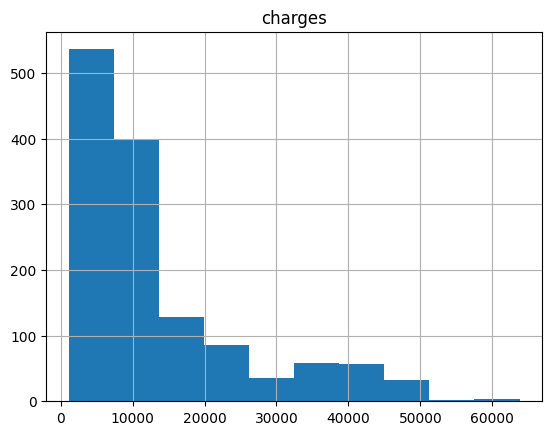

In [3]:
df.hist('charges')

In [4]:
df['log_insurance']=np.log2(df['charges'])

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges,log_insurance
0,19,female,27.900,0,yes,southwest,16884.92400,14.043448
1,18,male,33.770,1,no,southeast,1725.55230,10.752842
2,28,male,33.000,3,no,southeast,4449.46200,12.119415
3,33,male,22.705,0,no,northwest,21984.47061,14.424197
4,32,male,28.880,0,no,northwest,3866.85520,11.916945


array([[<AxesSubplot: title={'center': 'log_insurance'}>]], dtype=object)

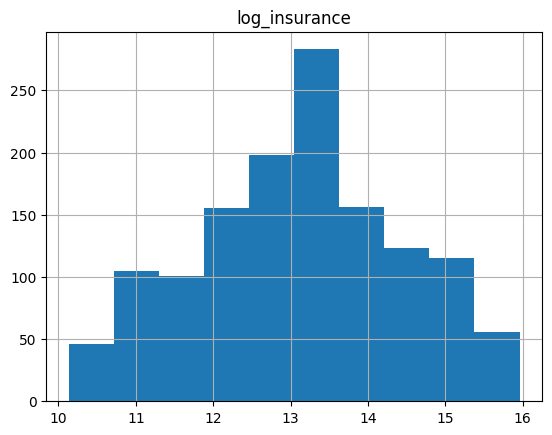

In [6]:
df.hist('log_insurance')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1338 non-null   int64  
 1   sex            1338 non-null   object 
 2   bmi            1338 non-null   float64
 3   children       1338 non-null   int64  
 4   smoker         1338 non-null   object 
 5   region         1338 non-null   object 
 6   charges        1338 non-null   float64
 7   log_insurance  1338 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB


In [8]:
numeric_data=df.select_dtypes(np.number)
numeric_data

,age,bmi,children,charges,log_insurance
0,19,27.900,0,16884.92400,14.043448
1,18,33.770,1,1725.55230,10.752842
2,28,33.000,3,4449.46200,12.119415
3,33,22.705,0,21984.47061,14.424197
4,32,28.880,0,3866.85520,11.916945
...,...,...,...,...,...
1333,50,30.970,3,10600.54830,13.371851
1334,18,31.920,0,2205.98080,11.107205
1335,18,36.850,0,1629.83350,10.670509
1336,21,25.800,0,2007.94500,10.971504


In [9]:
corr=numeric_data.corr()

In [10]:
corr['log_insurance']

age              0.527834
bmi              0.132669
children         0.161336
charges          0.892964
log_insurance    1.000000
Name: log_insurance, dtype: float64

In [11]:
predicater=['age','bmi']

In [12]:
catog_data=df.select_dtypes('O')
catog_data

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


<AxesSubplot: title={'center': 'log_insurance'}, xlabel='sex'>

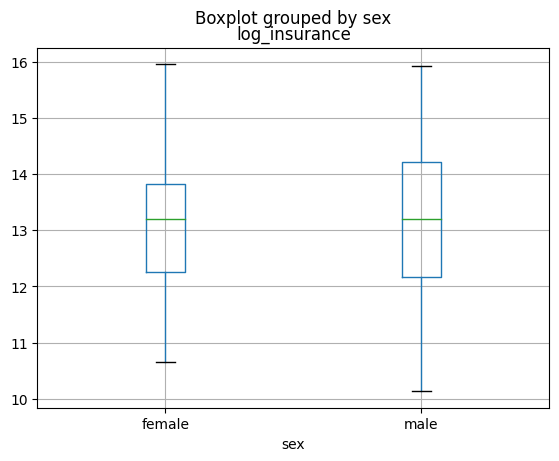

In [13]:
df.boxplot('log_insurance',by='sex')

<AxesSubplot: title={'center': 'log_insurance'}, xlabel='smoker'>

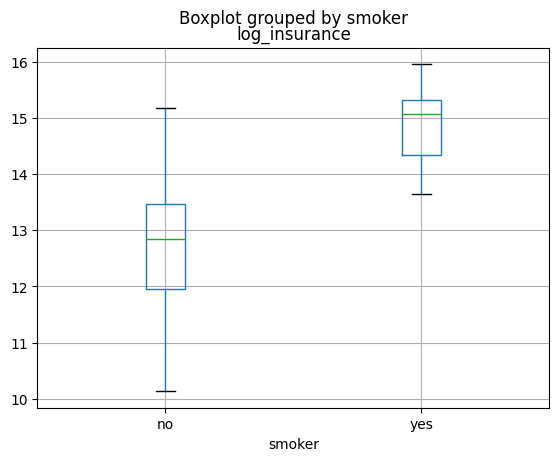

In [14]:
df.boxplot('log_insurance',by='smoker')

In [15]:
df['smoker']

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [16]:
df['smoker']=="yes"

0        True
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337     True
Name: smoker, Length: 1338, dtype: bool

In [17]:
df['is_smoker']=df['smoker']=="yes"

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges,log_insurance,is_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,14.043448,True
1,18,male,33.770,1,no,southeast,1725.55230,10.752842,False
2,28,male,33.000,3,no,southeast,4449.46200,12.119415,False
3,33,male,22.705,0,no,northwest,21984.47061,14.424197,False
4,32,male,28.880,0,no,northwest,3866.85520,11.916945,False


In [19]:
predicater.append('is_smoker')

In [20]:
predicater

['age', 'bmi', 'is_smoker']

In [21]:
X=df[predicater]

In [22]:
X

,age,bmi,is_smoker
0,19,27.900,True
1,18,33.770,False
2,28,33.000,False
3,33,22.705,False
4,32,28.880,False
...,...,...,...
1333,50,30.970,False
1334,18,31.920,False
1335,18,36.850,False
1336,21,25.800,False


In [23]:
Y=df['log_insurance']

In [24]:
Y

0       14.043448
1       10.752842
2       12.119415
3       14.424197
4       11.916945
          ...    
1333    13.371851
1334    11.107205
1335    10.670509
1336    10.971504
1337    14.830781
Name: log_insurance, Length: 1338, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
insurance_model=LinearRegression()

In [29]:
insurance_model.fit(X_train,y_train)

LinearRegression()

In [30]:
insurance_model.coef_

array([0.04983948, 0.01422752, 2.21807367])

In [31]:
insurance_model.intercept_

10.287964914278964

In [32]:
y_predict=insurance_model.predict(X_train)

In [33]:
y_predict_test=insurance_model.predict(X_test)

In [41]:
from sklearn.metrics import mean_squared_error,r2_score

In [36]:
mse=mean_squared_error(y_train,y_predict)

In [38]:
mse

0.4518841055670151

In [39]:
mse_test=mean_squared_error(y_test,y_predict_test)

In [40]:
mse_test

0.4396811462571399

In [42]:
r2_score(y_train,y_predict)

0.7401147505859649

In [43]:
r2_score(y_test,y_predict_test)

0.760697426214619

In [44]:
residuals=y_train-y_predict

In [47]:
residuals.sum().round()

-0.0

In [48]:
import matplotlib.pyplot as plt

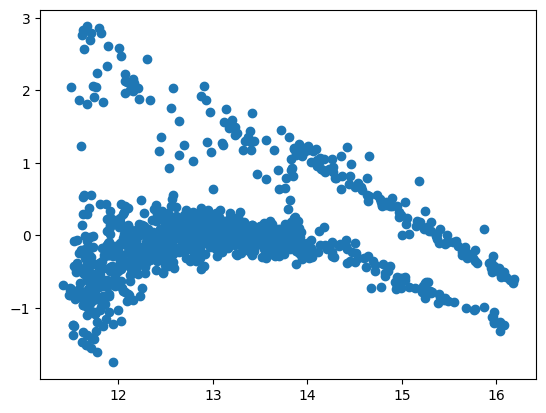

In [49]:
plt.scatter(y_predict,residuals)